Testing the asynchronous video access

In [1]:
from src.input_feed.image_feed.video_feed import VideoFeedAsync
def jobs_manager():
    from IPython.lib.backgroundjobs import BackgroundJobManager
    from IPython.core.magic import register_line_magic
    from IPython import get_ipython

    jobs = BackgroundJobManager()

    @register_line_magic
    def job(line):
        ip = get_ipython()
        jobs.new(line, ip.user_global_ns)

    return jobs

def kill_thread(thread):
    import ctypes

    id = thread.ident
    code = ctypes.pythonapi.PyThreadState_SetAsyncExc(
        ctypes.c_long(id),
        ctypes.py_object(SystemError)
    )
    if code == 0:
        raise ValueError('invalid thread id')
    elif code != 1:
        ctypes.pythonapi.PyThreadState_SetAsyncExc(
            ctypes.c_long(id),
            ctypes.c_long(0)
        )
        raise SystemError('PyThreadState_SetAsyncExc failed')

Error: Does not exist sound mixer library.
   > pip3 install pygame
Error: Does not exist ffmpeg.
   > brew install ffmpeg # on MacOSX
   or
   > sudo apt install -y ffmpeg # on Ubuntu


In [2]:
from src.main.flags_global import FLAGS
FLAGS.mark_as_parsed()
video = VideoFeedAsync()

jobs = jobs_manager()

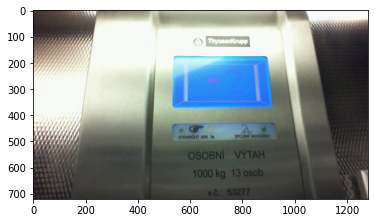

In [6]:
import matplotlib.pyplot as plt
frame = video.get_frame()
plt.imshow(frame)